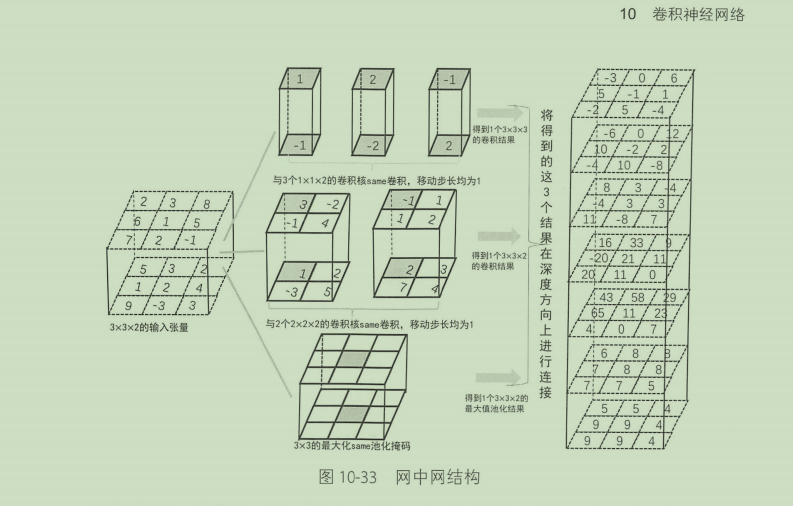

In [6]:
import tensorflow as tf
# 1个高为3, 宽为3, 深度为2(3x3x2)的输入张量
inputTensor = tf.constant(
    [
        [
            [[2,5],[3,3],[8,2]],
            [[6,1],[1,2],[5,4]],
            [[7,9],[2,-3],[-1,3]]
        ]
    ]
,tf.float32)

# 创建会话
session=tf.Session()

#3个高为1, 宽为1,深度为2 (1x1x2)的卷积核
filter112_3=tf.constant([
    [[[1,2,-1], [-1,-2,2]]]
],tf.float32)

result1=tf.nn.conv2d(inputTensor, filter112_3, [1,1,1,1], 'SAME')
print(session.run(result1))


# 2个高为2, 宽为2, 深度为2 (2x2x2)的卷积核
filter222_2=tf.constant([
    [[[3,-1], [1,2]] ,[[-2,1],[2,3]]],
    [[[1,-1], [-3,7]] ,[[4,2],[5,4]]]
],tf.float32)

result2=tf.nn.conv2d(inputTensor,filter222_2,[1,1,1,1],'SAME')
print(session.run(result2))


# 最大值池化
maxPool_33=tf.nn.max_pool(inputTensor,[1,3,3,1],[1,1,1,1],'SAME')
print(session.run(maxPool_33))
#深度方向上连接
result=tf.concat([result1, result2, maxPool_33],3)
print('打印结果如下：')
print(session.run(result))

[[[[-3. -6.  8.]
   [ 0.  0.  3.]
   [ 6. 12. -4.]]

  [[ 5. 10. -4.]
   [-1. -2.  3.]
   [ 1.  2.  3.]]

  [[-2. -4. 11.]
   [ 5. 10. -8.]
   [-4. -8.  7.]]]]
[[[[28. 31.]
   [35. 56.]
   [19. 19.]]

  [[-6. 51.]
   [25.  7.]
   [ 9. 25.]]

  [[20.  4.]
   [11.  0.]
   [ 0.  7.]]]]
[[[[6. 5.]
   [8. 5.]
   [8. 4.]]

  [[7. 9.]
   [8. 9.]
   [8. 4.]]

  [[7. 9.]
   [7. 9.]
   [5. 4.]]]]
打印结果如下：
[[[[-3. -6.  8. 28. 31.  6.  5.]
   [ 0.  0.  3. 35. 56.  8.  5.]
   [ 6. 12. -4. 19. 19.  8.  4.]]

  [[ 5. 10. -4. -6. 51.  7.  9.]
   [-1. -2.  3. 25.  7.  8.  9.]
   [ 1.  2.  3.  9. 25.  8.  4.]]

  [[-2. -4. 11. 20.  4.  7.  9.]
   [ 5. 10. -8. 11.  0.  7.  9.]
   [-4. -8.  7.  0.  7.  5.  4.]]]]
